In [2]:
import numpy as np
import tensorflow as tf

### Load and normalize our data

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


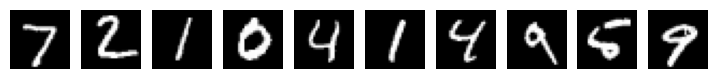

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Import the pretrained autoencoder

In [6]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

### Using Autoencoder to make predictions

In [7]:
reconstructed_images = pretrained_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


### Test the autoencoder model by reconstructing the test images and visually inspecting the results

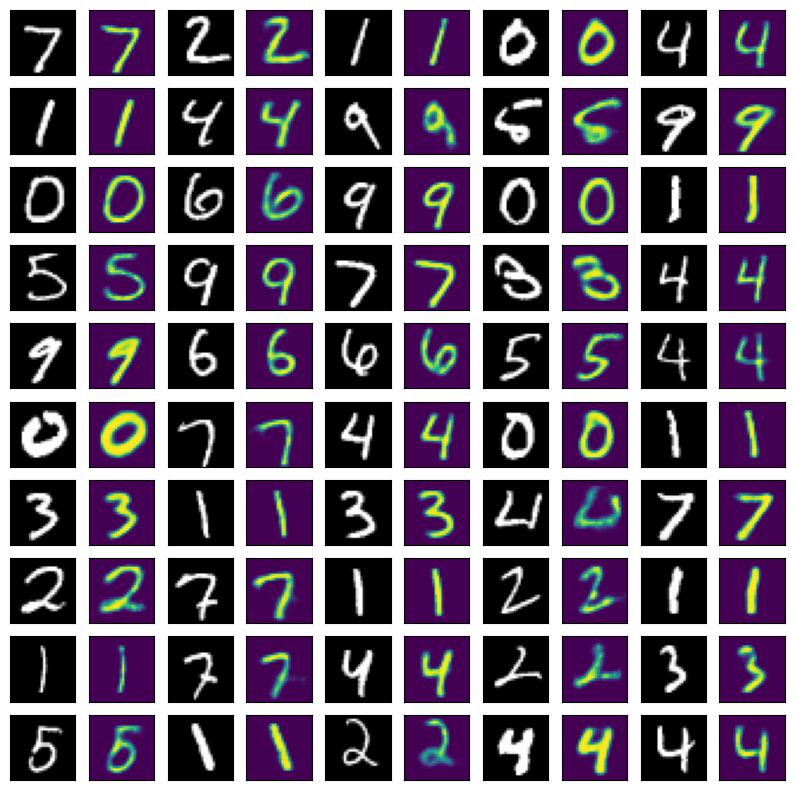

In [8]:
import matplotlib.pyplot as plt


images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()


### Loading the images 

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#Load the images and convert them to arrays
image1 = img_to_array(load_img('Image1.png', color_mode='grayscale')).reshape(784,)
image2 = img_to_array(load_img('Image2.png', color_mode='grayscale')).reshape(784,)
image3 = img_to_array(load_img('Image3.png', color_mode='grayscale')).reshape(784,)
image4 = img_to_array(load_img('Image4.png', color_mode='grayscale')).reshape(784,)
image5 = img_to_array(load_img('Image5.png', color_mode='grayscale')).reshape(784,)

# Create a list of the images
new_images = [image1, image2, image3, image4, image5]

# Stack the images along the first dimension to create a single array
new_images_array = np.stack(new_images, axis=0)

# Normalize the pixel values
new_images_array = new_images_array.astype('float32') / 255.0


In [11]:
# Add the new images to the dataset and oversample them
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Concatenate the new images and their labels to the training set
new_labels = [14, 14, 14, 14, 14]  # choose a label number not already present in the dataset
for i in range(len(new_images)):
    train_images = np.concatenate((train_images, np.tile(new_images_array[i], (1000, 1, 1)).reshape(-1, 784)))
    train_labels = np.concatenate((train_labels, np.full((1000,), new_labels[i])))

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [12]:
# Define the autoencoder architecture
input_dim = 784
latent_vec_len = 16
autoencoder = keras.models.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(latent_vec_len, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(input_dim, activation='sigmoid')
])

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


history = autoencoder.fit(train_images, train_images, epochs=10, batch_size=128, validation_data=(test_images, test_images))




Epoch 1/10
508/508 [==============================] - 12s 21ms/step - loss: 0.1806 - val_loss: 0.1305
Epoch 2/10
508/508 [==============================] - 11s 22ms/step - loss: 0.1175 - val_loss: 0.1159
Epoch 3/10
508/508 [==============================] - 11s 21ms/step - loss: 0.1093 - val_loss: 0.1104
Epoch 4/10
508/508 [==============================] - 11s 21ms/step - loss: 0.1052 - val_loss: 0.1076
Epoch 5/10
508/508 [==============================] - 11s 21ms/step - loss: 0.1025 - val_loss: 0.1052
Epoch 6/10
508/508 [==============================] - 11s 21ms/step - loss: 0.1005 - val_loss: 0.1038
Epoch 7/10
508/508 [==============================] - 10s 20ms/step - loss: 0.0991 - val_loss: 0.1026
Epoch 8/10
508/508 [==============================] - 11s 21ms/step - loss: 0.0978 - val_loss: 0.1009
Epoch 9/10
508/508 [==============================] - 11s 21ms/step - loss: 0.0968 - val_loss: 0.1008
Epoch 10/10
508/508 [==============================] - 11s 21ms/step - loss: 0.095

In [23]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Save the trained autoencoder to your Google Drive
autoencoder.save('/content/drive/MyDrive/my_autoencoder.h5')
# save the model
autoencoder.save(save_path)

Mounted at /content/drive


1/1 [==============================] - 0s 17ms/step


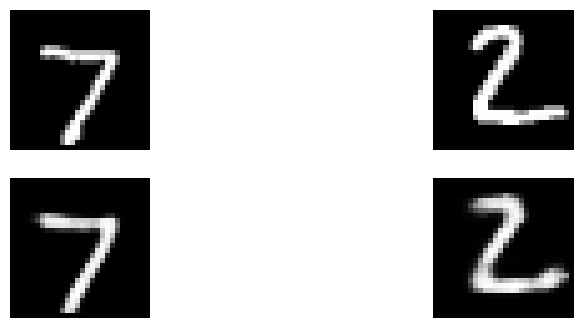

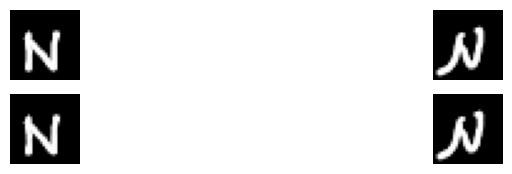

In [14]:
import matplotlib.pyplot as plt

# Generate reconstructed images for the test set and the new images
reconstructed_test = autoencoder.predict(test_images)
reconstructed_new = autoencoder.predict(new_images_array.reshape(-1, 784))

# Plot a few examples of the reconstructed images
n_examples = 2
plt.figure(figsize=(10, 4))
for i in range(n_examples):
    # Plot the original image
    ax = plt.subplot(2, n_examples, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Plot the reconstructed image
    ax = plt.subplot(2, n_examples, i+n_examples+1)
    plt.imshow(reconstructed_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

# Plot a few examples of the reconstructed new images
plt.figure(figsize=(10, 2))
for i in range(n_examples):
    # Plot the original image
    ax = plt.subplot(2, n_examples, i+1)
    plt.imshow(new_images_array[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Plot the reconstructed image
    ax = plt.subplot(2, n_examples, i+n_examples+1)
    plt.imshow(reconstructed_new[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


The new Model is predicting the images right